# Predicting Order Outcomes: An Analysis of Amazon Order Fulfillment and Returns

# Data Overview

The order data includes details about each order, such as order number, order date, buyer information, city and state of the shipment, product SKU, product description, quantity, item total price, shipping fee, payment method (like Cash On Delivery), and the order status.

## Introduction:

This project analyzes Amazon order data for a seller to predict the final status of each order: either "Delivered to Buyer" or "Returned to Seller." By accurately predicting order outcomes, the seller can better manage inventory, improve customer satisfaction, and reduce costs associated with returns.

# Problem Statement:

The goal is to predict whether an order will be successfully delivered or returned to the seller. This prediction helps identify patterns in failed deliveries, guiding actionable strategies for reducing return rates and enhancing operational efficiency.


# Aim of the Project:

The primary aim is to use Amazon order data to train a predictive model that determines the final status of orders. By leveraging customer and order attributes, the model will predict if an order is likely to be returned, enabling the seller to make informed decisions.

# Exploratory Data Analysis (EDA) Findings

Data Distribution: The data includes details such as order date, buyer location, order item details, payment method, and status.
Order Attributes: Majority of orders are paid via standard payment methods, while some use Cash on Delivery (COD), influencing return rates.
Geographical Trends: Orders from specific regions or states show higher rates of return, indicating potential logistical or delivery challenges.
Price and Quantity: Higher-value items and larger quantities were found to correlate with a higher return rate, which may reflect customer expectations or product quality issues.

# Key Insights:

COD Orders and Returns: A notable trend in COD orders indicates higher return rates, suggesting a lack of commitment from customers compared to pre-paid orders.
Regional Patterns: Specific regions show a higher likelihood of returns, potentially due to logistical complexities or product fitment issues in these areas.
Product Types and Return Rates: Some SKUs and product categories experience a disproportionately high return rate, highlighting areas for potential product or service improvement.

# Recommendations:

Enhance Customer Communication for COD Orders: Strengthening confirmation processes for COD purchases may reduce returns.
Improve Targeted Marketing and Inventory Management: Focusing on regions with lower return rates and stocking accordingly could optimize inventory management.
Product Quality and Description Improvements: For high-return items, consider enhancing product descriptions or quality adjustments to set accurate expectations.

# Conclusion:

The analysis reveals meaningful patterns in order returns, especially around payment methods and geographic regions. Implementing data-driven strategies based on these insights could substantially reduce return rates, resulting in improved profitability and customer experience.

# Loading and Exploring the Data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('~/Desktop/projects/orders_data.xlsx')

print(data.head())

              order_no                       order_date       buyer  \
0  405-9763961-5211537  Sun, 18 Jul, 2021, 10:38 pm IST         Mr.   
1  404-3964908-7850720   Tue, 19 Oct, 2021, 6:05 pm IST       Minam   
2  171-8103182-4289117  Sun, 28 Nov, 2021, 10:20 pm IST  yatipertin   
3  405-3171677-9557154   Wed, 28 Jul, 2021, 4:06 am IST       aciya   
4  402-8910771-1215552  Tue, 28 Sept, 2021, 2:50 pm IST     Susmita   

      ship_city         ship_state                 sku  \
0   CHANDIGARH,         CHANDIGARH  SKU:  2X-3C0F-KNJE   
1     PASIGHAT,  ARUNACHAL PRADESH  SKU:  DN-0WDX-VYOT   
2     PASIGHAT,  ARUNACHAL PRADESH  SKU:  DN-0WDX-VYOT   
3  DEVARAKONDA,          TELANGANA  SKU:  AH-J3AO-R7DN   
4       MUMBAI,        MAHARASHTRA  SKU:  KL-7WAA-Z82I   

                                         description  quantity item_total  \
0  100% Leather Elephant Shaped Piggy Coin Bank |...         1    ₹449.00   
1  Women's Set of 5 Multicolor Pure Leather Singl...         1    ₹449

In [3]:
data.shape

(171, 12)

In [4]:
data.describe()

,quantity
count,171.000000
mean,1.087719
std,0.445132
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,4.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_no      171 non-null    object
 1   order_date    171 non-null    object
 2   buyer         171 non-null    object
 3   ship_city     171 non-null    object
 4   ship_state    171 non-null    object
 5   sku           171 non-null    object
 6   description   171 non-null    object
 7   quantity      171 non-null    int64 
 8   item_total    153 non-null    object
 9   shipping_fee  145 non-null    object
 10  cod           47 non-null     object
 11  order_status  171 non-null    object
dtypes: int64(1), object(11)
memory usage: 16.2+ KB


In [6]:
data['quantity'].unique()

array([1, 4, 2, 3], dtype=int64)

In [7]:
data['ship_city'].unique()

array(['CHANDIGARH,', 'PASIGHAT,', 'DEVARAKONDA,', 'MUMBAI,', 'HOWRAH,',
       'ORAI,', 'BAREILLY,', 'BENGALURU,', 'Bhilai,', 'FARIDABAD,',
       'AGARTALA,', 'COONOOR,', 'PUNE,', 'MANTHA,', 'KOLKATA,',
       'MAHALINGPUR,', 'HYDERABAD,', 'MUMBAI 400 026,', 'CUTTACK,',
       'GURUGRAM,', 'JALESWAR,', 'VISAKHAPATNAM,', 'PUNEpune,',
       'NEW DELHI,', 'RAIA,', 'Bhubaneswar,', 'JAGDALPUR,', 'SALEM,',
       'JAMMU,', 'AHMEDABAD,', 'Mumbai,', 'SILCHAR,', 'GUWAHATI,',
       'Ernakulam,', 'KARAIKKUDI,', 'KODAD,', 'BADLAPUR,', 'Surat,',
       'THANE,', 'POLLACHI,', 'Pune,', 'RAIPUR,', 'JALANDHAR,',
       'THISAYANVILAI,', 'BIDHAN NAGAR,', 'New Delhi,', 'Tuticorin,',
       'JAIPUR,', 'CHENNAI,', 'PALAI,', 'KORBA,', 'SAHARANPUR,',
       'THAMARASSERY,', 'GAUTAM BUDDHA NAGAR,', 'KATWA,', 'JODHPUR,',
       'MALDA,', 'NOIDA,', 'CHANDIGARH', 'SECUNDERABAD,', 'Kolkata,',
       'SIWAN,', 'NAVI MUMBAI,', 'Bardez,', 'chennai,', 'Thane District,',
       'INDORE,', 'Visakhapatnam,', 'GHAZIA

# Data Cleaning and Preprocessing:

In [8]:
nl_values=data.isnull().sum()
nl_values.to_frame('count')

,count
order_no,0
order_date,0
buyer,0
ship_city,0
ship_state,0
sku,0
description,0
quantity,0
item_total,18
shipping_fee,26


In [9]:
data['order_status'].value_counts()

order_status
Delivered to buyer    160
Returned to seller     11
Name: count, dtype: int64

In [10]:
data['cod'].unique()

array([nan, 'Cash On Delivery'], dtype=object)

In [11]:
data[['quantity','cod']]

,quantity,cod
0,1,NaN
1,1,NaN
2,1,NaN
3,1,Cash On Delivery
4,1,NaN
...,...,...
166,3,Cash On Delivery
167,1,NaN
168,1,NaN
169,1,Cash On Delivery


In [12]:
data.loc[data['quantity']==1]


,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹449.00,NaN,NaN,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹84.96,NaN,Delivered to buyer
...,...,...,...,...,...,...,...,...,...,...,...,...
165,402-1808225-2809140,"Sat, 25 Dec, 2021, 4:03 pm IST",User,"Solan,",Himachal Pradesh,SKU: S1-A92Q-JU3X,100% Pure Leather Shantiniketan Clutch Purse: ...,1,₹399.00,₹84.96,NaN,Delivered to buyer
167,402-3045457-5360311,"Wed, 1 Dec, 2021, 12:18 pm IST",Sharmistha,"DEHRADUN,",UTTARAKHAND,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,"₹1,299.00",₹114.46,NaN,Delivered to buyer
168,408-2260162-8323567,"Thu, 9 Dec, 2021, 6:55 pm IST",shashank,"Durg,",CHHATTISGARH,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,"₹1,299.00",₹105.02,NaN,Delivered to buyer
169,403-5664951-8941100,"Wed, 23 Feb, 2022, 12:43 am IST",Jayeta,"KOLKATA,",WEST BENGAL,SKU: N8-YFZF-P74I,Stylish and Sleek Multiple Pockets 100 Percent...,1,"₹1,499.00",₹80.24,Cash On Delivery,Delivered to buyer


In [13]:
data.loc[data['order_status']!='Delivered to buyer']


,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
6,404-5794317-7737924,"Thu, 12 Aug, 2021, 8:03 pm IST",shailendra,"ORAI,",UTTAR PRADESH,SKU: TQ-OE6K-9DIK,Ultra Slim 100% Pure Leather Men's Wallet with...,1,NaN,NaN,Cash On Delivery,Returned to seller
14,408-9557300-6760347,"Thu, 14 Oct, 2021, 11:14 pm IST",Satish,"MANTHA,",MAHARASHTRA,SKU: YJ-5CCT-M3PP,Pure Leather Camel Color Gent's Wallet with Co...,1,NaN,₹84.96,Cash On Delivery,Returned to seller
22,171-6105173-4790734,"Fri, 26 Nov, 2021, 7:22 pm IST",Geetika,"GURUGRAM,",HARYANA,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,NaN,₹84.96,NaN,Returned to seller
24,403-7876698-8356365,"Fri, 25 Jun, 2021, 7:48 am IST",Yash,"MUMBAI,",MAHARASHTRA,SKU: 3O-GBSM-TYZE,100% Leather Ganesh Ji Piggy Coin Bank | Block...,1,NaN,NaN,Cash On Delivery,Returned to seller
39,404-8031085-1381943,"Fri, 26 Nov, 2021, 9:12 pm IST",Kangana,"NEW DELHI,",DELHI,SKU: 54-D265-B74K,Set of 2 Pure Leather Block Print Round Jewelr...,4,NaN,₹84.96,NaN,Returned to seller
43,405-8481932-1229966,"Sun, 31 Oct, 2021, 11:38 am IST",Amala,"KOLKATA,",WEST BENGAL,SKU: S1-A92Q-JU3X,100% Pure Leather Shantiniketan Clutch Purse: ...,1,NaN,₹47.20,NaN,Returned to seller
47,405-1981073-5970737,"Tue, 5 Oct, 2021, 8:53 pm IST",Jitu,"GUWAHATI,",ASSAM,SKU: I1-AWVT-2QOL,Women's Pure Leather Jhallar Clutch Purse with...,1,NaN,₹60.18,Cash On Delivery,Returned to seller
114,405-0209265-6273962,"Sun, 23 Jan, 2022, 9:37 am IST",Gargi,"Ernakulam,",KERALA,SKU: V6-KQJX-XGP2,Women's Pure Leather Jhallar Clutch Purse with...,1,NaN,₹84.96,NaN,Returned to seller
134,171-3919731-3769907,"Tue, 25 Jan, 2022, 11:32 am IST",Deepali,"JODHPUR,",RAJASTHAN,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,NaN,₹84.96,NaN,Returned to seller
150,405-7352232-5348320,"Sun, 19 Dec, 2021, 7:41 am IST",DIVYA,"BENGALURU,",KARNATAKA,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,NaN,₹84.96,NaN,Returned to seller


In [14]:
data.loc[data['order_status']!='Delivered to buyer']['item_total'].isna().sum()
#Means all tge values having order_status ->returned to seller have item total =NAN

11

In [15]:
data['item_total'].value_counts()

item_total
₹449.00      52
₹399.00      36
₹549.00      11
₹349.00       8
₹250.00       7
₹1,299.00     7
₹1,099.00     7
₹649.00       5
₹475.00       5
₹175.00       4
₹1,347.00     2
₹3,897.00     2
₹1,499.00     2
₹200.00       1
₹898.00       1
₹499.00       1
₹899.00       1
₹1,796.00     1
Name: count, dtype: int64

In [16]:
data['item_total'].isna().sum()

18

In [17]:
data.loc[data['item_total'].isna()]

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer
6,404-5794317-7737924,"Thu, 12 Aug, 2021, 8:03 pm IST",shailendra,"ORAI,",UTTAR PRADESH,SKU: TQ-OE6K-9DIK,Ultra Slim 100% Pure Leather Men's Wallet with...,1,NaN,NaN,Cash On Delivery,Returned to seller
14,408-9557300-6760347,"Thu, 14 Oct, 2021, 11:14 pm IST",Satish,"MANTHA,",MAHARASHTRA,SKU: YJ-5CCT-M3PP,Pure Leather Camel Color Gent's Wallet with Co...,1,NaN,₹84.96,Cash On Delivery,Returned to seller
22,171-6105173-4790734,"Fri, 26 Nov, 2021, 7:22 pm IST",Geetika,"GURUGRAM,",HARYANA,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,NaN,₹84.96,NaN,Returned to seller
24,403-7876698-8356365,"Fri, 25 Jun, 2021, 7:48 am IST",Yash,"MUMBAI,",MAHARASHTRA,SKU: 3O-GBSM-TYZE,100% Leather Ganesh Ji Piggy Coin Bank | Block...,1,NaN,NaN,Cash On Delivery,Returned to seller
39,404-8031085-1381943,"Fri, 26 Nov, 2021, 9:12 pm IST",Kangana,"NEW DELHI,",DELHI,SKU: 54-D265-B74K,Set of 2 Pure Leather Block Print Round Jewelr...,4,NaN,₹84.96,NaN,Returned to seller
43,405-8481932-1229966,"Sun, 31 Oct, 2021, 11:38 am IST",Amala,"KOLKATA,",WEST BENGAL,SKU: S1-A92Q-JU3X,100% Pure Leather Shantiniketan Clutch Purse: ...,1,NaN,₹47.20,NaN,Returned to seller
47,405-1981073-5970737,"Tue, 5 Oct, 2021, 8:53 pm IST",Jitu,"GUWAHATI,",ASSAM,SKU: I1-AWVT-2QOL,Women's Pure Leather Jhallar Clutch Purse with...,1,NaN,₹60.18,Cash On Delivery,Returned to seller
64,406-9458224-2717157,"Tue, 9 Nov, 2021, 11:23 pm IST",Pooja,"GURUGRAM,",HARYANA,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,NaN,₹84.96,NaN,Delivered to buyer
87,403-4274611-4049927,"Thu, 7 Oct, 2021, 11:23 am IST",Pooja,"SAHARANPUR,",UTTAR PRADESH,SKU: UR-WJJ0-I3TN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,₹84.96,NaN,Delivered to buyer


In [18]:

data.loc[(data['item_total'].isna()) & (data['shipping_fee'].isna())]


,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer
6,404-5794317-7737924,"Thu, 12 Aug, 2021, 8:03 pm IST",shailendra,"ORAI,",UTTAR PRADESH,SKU: TQ-OE6K-9DIK,Ultra Slim 100% Pure Leather Men's Wallet with...,1,NaN,NaN,Cash On Delivery,Returned to seller
24,403-7876698-8356365,"Fri, 25 Jun, 2021, 7:48 am IST",Yash,"MUMBAI,",MAHARASHTRA,SKU: 3O-GBSM-TYZE,100% Leather Ganesh Ji Piggy Coin Bank | Block...,1,NaN,NaN,Cash On Delivery,Returned to seller


# DATA CLEANING

In [19]:
#converting item_total into float
values = []
for cur in data['item_total']:
    if pd.isna(cur):
        values.append(0.0)  # Handle missing values (NaN) item_total
    else:
        c = float(cur.replace('₹', '').replace(',', ''))  # Convert string to float after removing '₹' and commas
        values.append(c)

print(values)
data['item_total']=values

[449.0, 449.0, 449.0, 0.0, 1099.0, 200.0, 0.0, 399.0, 399.0, 1099.0, 449.0, 449.0, 449.0, 1099.0, 0.0, 1099.0, 649.0, 449.0, 399.0, 399.0, 399.0, 449.0, 0.0, 399.0, 0.0, 649.0, 250.0, 449.0, 399.0, 449.0, 449.0, 399.0, 449.0, 449.0, 250.0, 399.0, 399.0, 449.0, 399.0, 0.0, 549.0, 250.0, 449.0, 0.0, 449.0, 250.0, 1099.0, 0.0, 1099.0, 649.0, 449.0, 399.0, 175.0, 449.0, 549.0, 399.0, 175.0, 399.0, 1299.0, 175.0, 175.0, 399.0, 399.0, 349.0, 0.0, 449.0, 399.0, 449.0, 449.0, 449.0, 399.0, 250.0, 349.0, 549.0, 1299.0, 449.0, 349.0, 250.0, 449.0, 549.0, 399.0, 399.0, 399.0, 549.0, 449.0, 250.0, 898.0, 0.0, 399.0, 449.0, 1099.0, 399.0, 649.0, 399.0, 399.0, 449.0, 0.0, 1347.0, 549.0, 399.0, 449.0, 549.0, 499.0, 449.0, 649.0, 399.0, 0.0, 475.0, 399.0, 1299.0, 449.0, 1299.0, 549.0, 399.0, 0.0, 0.0, 1299.0, 3897.0, 449.0, 449.0, 1499.0, 3897.0, 349.0, 449.0, 449.0, 399.0, 349.0, 449.0, 899.0, 475.0, 549.0, 449.0, 399.0, 449.0, 0.0, 449.0, 1796.0, 449.0, 449.0, 549.0, 399.0, 349.0, 449.0, 475.0, 449.

In [20]:
#converting shipping_fee into float
values = []
for cur in data['shipping_fee']:
    if pd.isna(cur):
        values.append(0.0)  # Handle missing values (NaN)shipping_fee
    else:
        c = float(cur.replace('₹', '').replace(',', ''))  # Convert string to float after removing '₹' and commas
        values.append(c)

print(values)
data['shipping_fee']=values

[0.0, 60.18, 60.18, 0.0, 84.96, 0.0, 0.0, 84.96, 84.96, 0.0, 114.46, 60.18, 84.96, 84.96, 84.96, 62.54, 81.42, 84.96, 84.96, 84.96, 84.96, 60.18, 84.96, 84.96, 0.0, 60.18, 0.0, 84.96, 84.96, 0.0, 60.18, 60.18, 84.96, 84.96, 47.2, 84.96, 84.96, 84.96, 84.96, 84.96, 84.96, 84.96, 84.96, 47.2, 0.0, 60.18, 0.0, 60.18, 0.0, 84.96, 84.96, 0.0, 0.0, 84.96, 47.2, 47.2, 0.0, 84.96, 178.18, 0.0, 0.0, 84.96, 84.96, 0.0, 84.96, 84.96, 84.96, 84.96, 0.0, 47.2, 60.18, 0.0, 0.0, 0.0, 210.04, 84.96, 0.0, 84.96, 60.18, 84.96, 84.96, 47.2, 84.96, 114.46, 84.96, 81.42, 84.96, 84.96, 210.04, 0.0, 0.0, 84.96, 60.18, 0.0, 84.96, 84.96, 84.96, 84.96, 84.96, 0.0, 60.18, 84.96, 84.96, 84.96, 60.18, 84.96, 84.96, 84.96, 84.96, 80.24, 84.96, 146.32, 60.18, 84.96, 84.96, 84.96, 114.46, 133.34, 84.96, 84.96, 114.46, 241.9, 84.96, 84.96, 84.96, 84.96, 84.96, 84.96, 114.46, 84.96, 84.96, 84.96, 84.96, 84.96, 84.96, 84.96, 84.96, 84.96, 84.96, 47.2, 47.2, 84.96, 84.96, 47.2, 84.96, 84.96, 84.96, 60.18, 84.96, 84.96, 

In [21]:
data.duplicated().sum()

0

In [22]:
data['cod'].fillna('Online payment',inplace=True)

In [23]:
data.isnull().sum()

order_no        0
order_date      0
buyer           0
ship_city       0
ship_state      0
sku             0
description     0
quantity        0
item_total      0
shipping_fee    0
cod             0
order_status    0
dtype: int64

Now data has no null values.

# Exploratory Data Analysis (EDA):

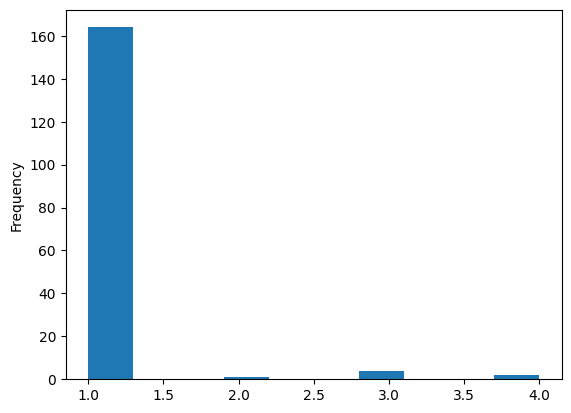

In [24]:
data["quantity"].plot.hist();

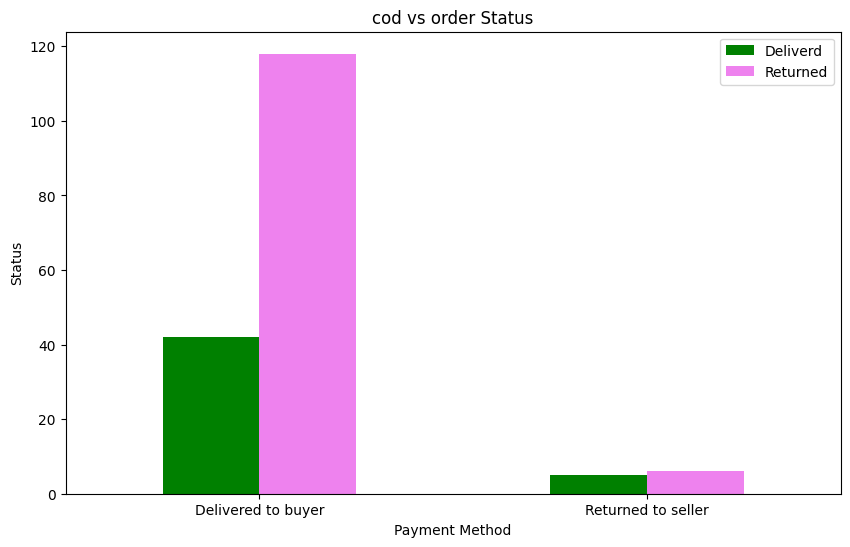

In [25]:
status=data['order_status'].value_counts()
payment_mode=data['cod'].value_counts()
#plt.bar(status.index,status.values)
pd.crosstab(data['order_status'], data['cod']).plot(kind="bar", figsize=(10,6),
                                                color=["green", "violet"]);
plt.title('cod vs order Status')
plt.xlabel("Payment Method")
plt.ylabel("Status")
plt.legend(["Deliverd", "Returned"])
plt.xticks(rotation=0);



In [26]:
#state wise status 
data['ship_state'].value_counts()

ship_state
MAHARASHTRA          31
WEST BENGAL          19
TAMIL NADU           17
KARNATAKA            16
TELANGANA            13
UTTAR PRADESH        12
DELHI                 8
HARYANA               8
CHHATTISGARH          6
GUJARAT               6
KERALA                4
ASSAM                 4
CHANDIGARH            3
RAJASTHAN             3
ANDHRA PRADESH        3
GOA                   2
ARUNACHAL PRADESH     2
ODISHA                2
Andhra Pradesh        1
BIHAR                 1
Himachal Pradesh      1
MOHALI,               1
MADHYA Pradesh        1
Odisha                1
CHANDIGARH,           1
PUNJAB                1
Maharashtra           1
JAMMU & KASHMIR       1
TRIPURA               1
UTTARAKHAND           1
Name: count, dtype: int64

In [27]:
state_shipping_relation = data.groupby(['ship_state', 'order_status']).size().unstack(fill_value=0)
state_shipping_relation

order_status,Delivered to buyer,Returned to seller
ship_state,,
ANDHRA PRADESH,3,0
ARUNACHAL PRADESH,2,0
ASSAM,3,1
Andhra Pradesh,1,0
BIHAR,1,0
CHANDIGARH,3,0
"CHANDIGARH,",1,0
CHHATTISGARH,6,0
DELHI,7,1


<Axes: xlabel='ship_state'>

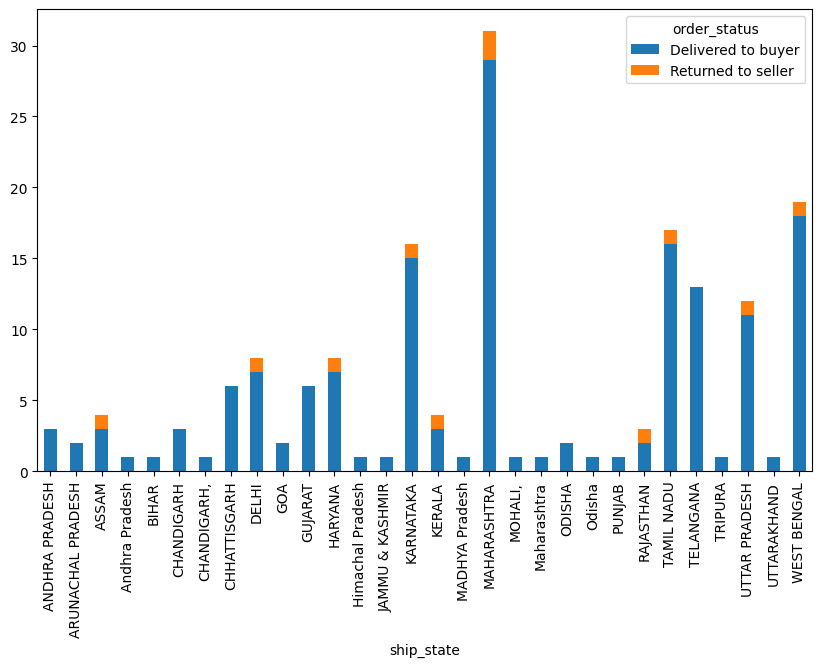

In [28]:
state_shipping_relation.plot(kind='bar', stacked=True, figsize=(10, 6))

In [29]:
data.head()

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,449.0,0.00,Online payment,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,Online payment,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,Online payment,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,0.0,0.00,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,1099.0,84.96,Online payment,Delivered to buyer


In [30]:
data['sku'].unique()

array(['SKU:  2X-3C0F-KNJE', 'SKU:  DN-0WDX-VYOT', 'SKU:  AH-J3AO-R7DN',
       'SKU:  KL-7WAA-Z82I', 'SKU:  HH-FOWV-5YWO', 'SKU:  TQ-OE6K-9DIK',
       'SKU:  S1-A92Q-JU3X', 'SKU:  3F-4R9N-Z8NJ', 'SKU:  NU-CKZ5-4O49',
       'SKU:  94-TSV3-EIW6', 'SKU:  FL-4CMG-CU48', 'SKU:  YJ-5CCT-M3PP',
       'SKU:  PG-WS6J-89DG', 'SKU:  O9-OVS7-G9XK', 'SKU:  AY-Z7BT-BMVM',
       'SKU:  3O-GBSM-TYZE', 'SKU:  0M-RFE6-443C', 'SKU:  TY-4GPW-U54J',
       'SKU:  9S-GE8P-RIR4', 'SKU:  CR-6E69-UXFW', 'SKU:  54-D265-B74K',
       'SKU:  D4-UD68-TMXH', 'SKU:  I1-AWVT-2QOL', 'SKU:  WR-ANCX-U28C',
       'SKU:  W4-JQ2J-ZUF2', 'SKU:  5B-NW9K-L3AO', 'SKU:  86-JXO3-EJ7K',
       'SKU:  SB-WDQN-SDN9', 'SKU:  QV-PHXY-LGY8', 'SKU:  H6-A9OJ-C0Q1',
       'SKU:  1T-RAUZ-UZKO', 'SKU:  UR-WJJ0-I3TN', 'SKU:  RG-29TH-MROF',
       'SKU:  GP-RMI4-GJ6L', 'SKU:  U1-8YOK-510E', 'SKU:  D9-CVL3-8JF6',
       'SKU:  G4-B5GQ-8V30', 'SKU:  NV-1DWM-41VX', 'SKU:  9W-AS6W-6O9X',
       'SKU:  QD-RNE2-2FH8', 'SKU:  3V-FKXN-C4QJ', 

In [31]:
sku_values=data['sku'].value_counts()

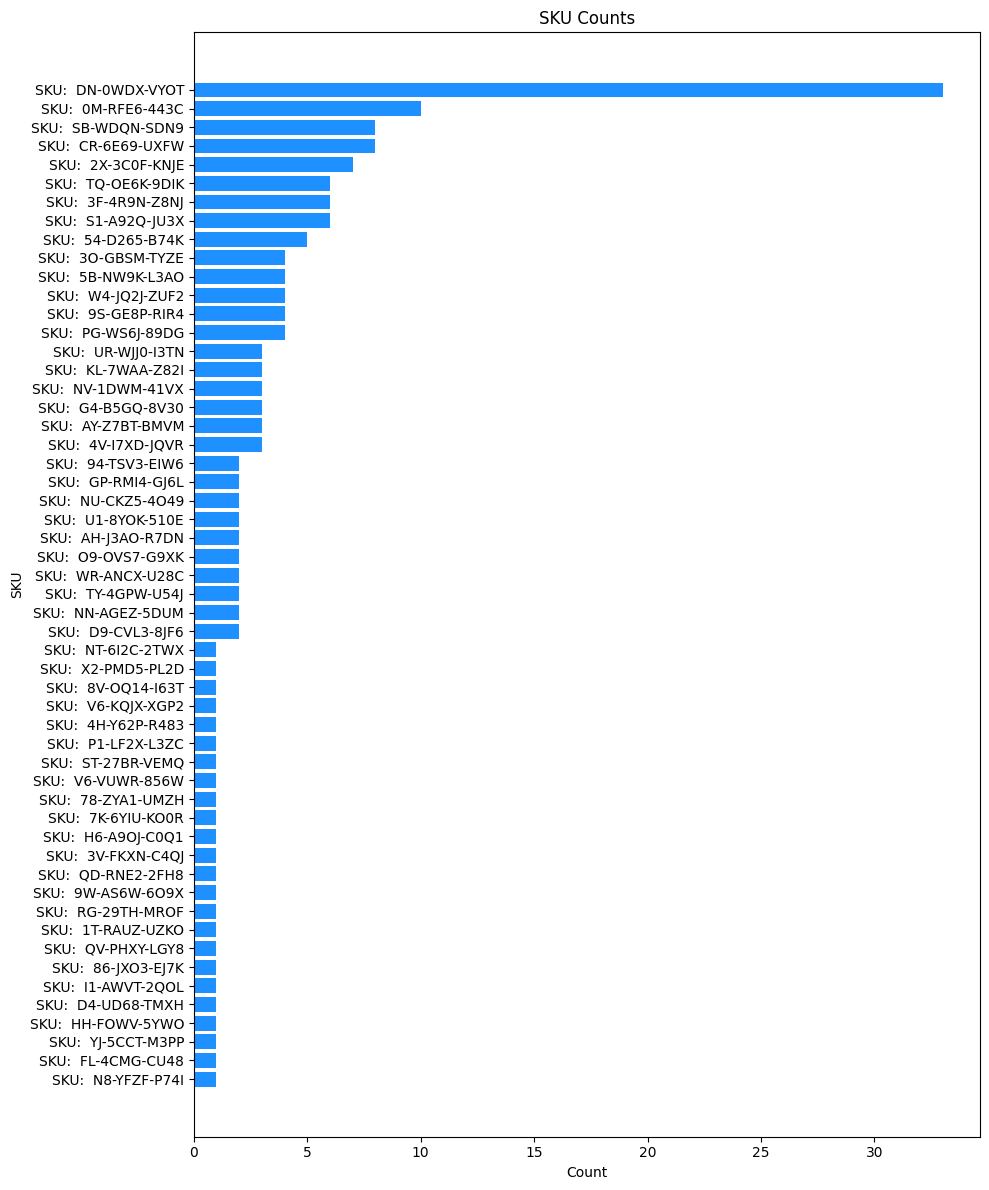

In [32]:
#count of unique sku values
plt.figure(figsize=(10, 12))
plt.barh(sku_values.index, sku_values.values, color='dodgerblue')
plt.xlabel('Count')
plt.ylabel('SKU')
plt.title('SKU Counts')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest count at the top
plt.tight_layout()
plt.show()



In [33]:
data['sku']

0      SKU:  2X-3C0F-KNJE
1      SKU:  DN-0WDX-VYOT
2      SKU:  DN-0WDX-VYOT
3      SKU:  AH-J3AO-R7DN
4      SKU:  KL-7WAA-Z82I
              ...        
166    SKU:  DN-0WDX-VYOT
167    SKU:  SB-WDQN-SDN9
168    SKU:  SB-WDQN-SDN9
169    SKU:  N8-YFZF-P74I
170    SKU:  2X-3C0F-KNJE
Name: sku, Length: 171, dtype: object

<Axes: xlabel='sku'>

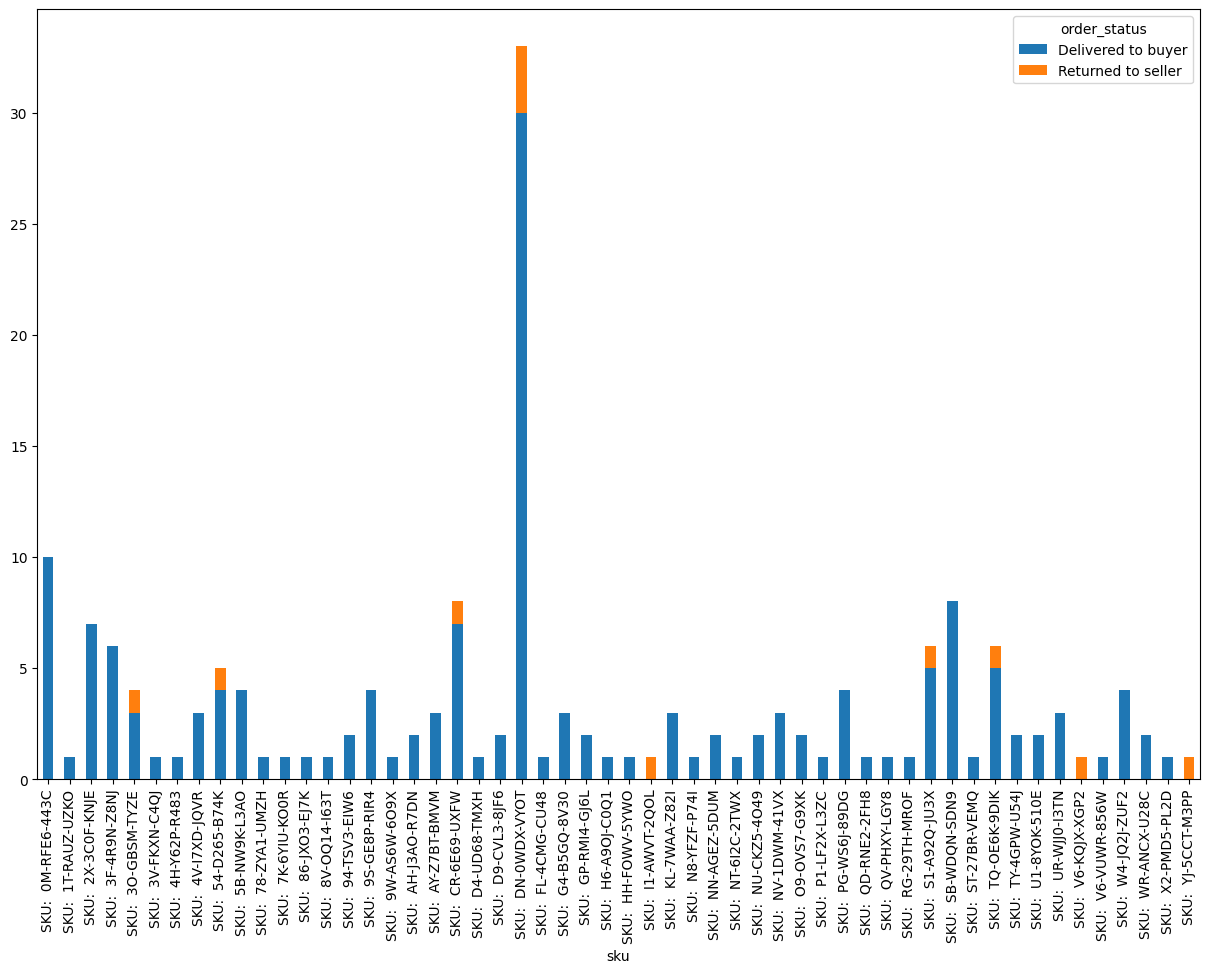

In [34]:
sku_order_status=data.groupby(['sku', 'order_status']).size().unstack(fill_value=0)
sku_order_status.plot(kind='bar', stacked=True, figsize=(15, 10))

<Axes: xlabel='sku'>

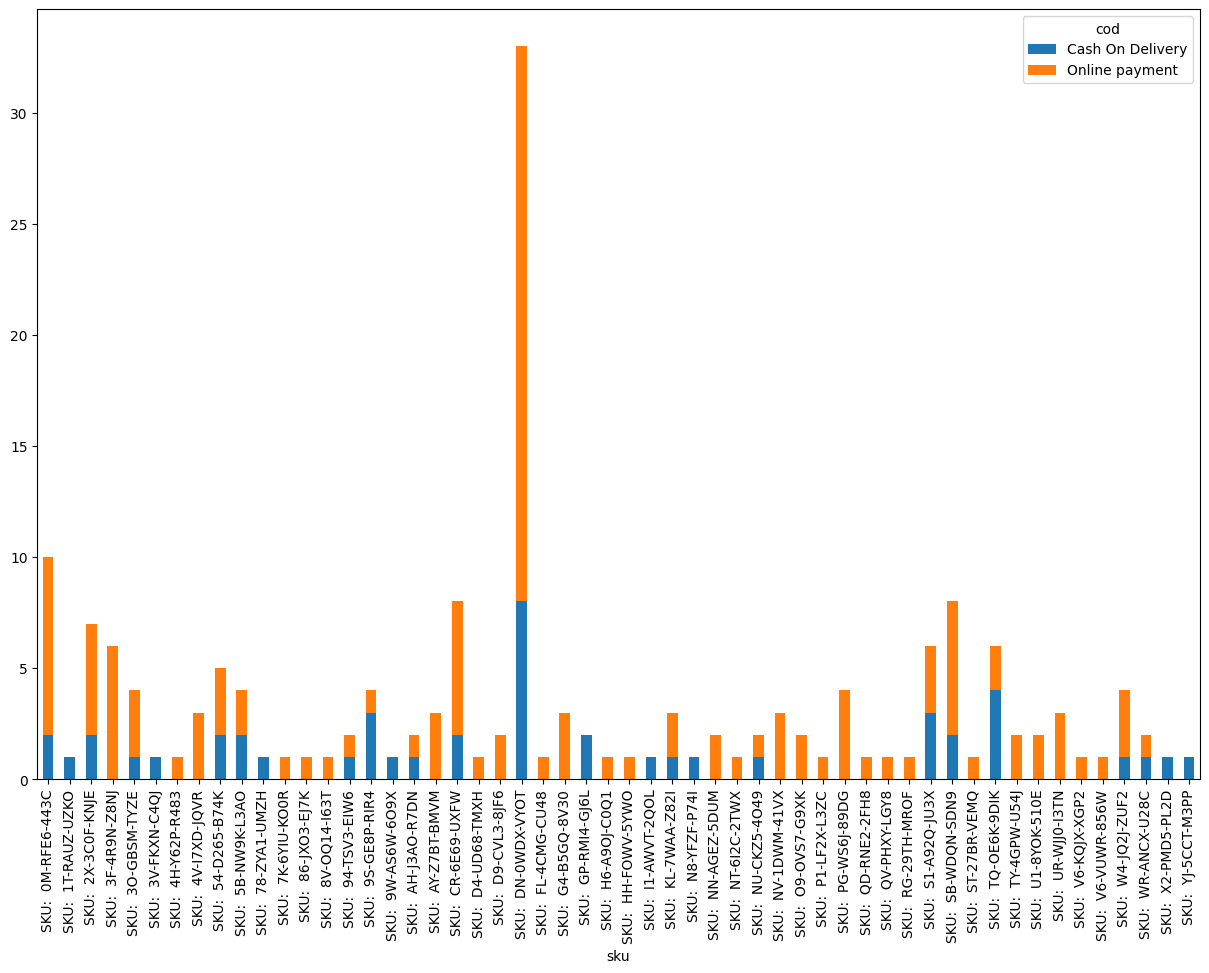

In [35]:
sku_order_status=data.groupby(['sku', 'cod']).size().unstack(fill_value=0)
sku_order_status.plot(kind='bar', stacked=True, figsize=(15, 10))

In [36]:
# Converting the place(city) to uppercase
place = ['ship_city']
for i in place:
    data[i] = data[i].apply(lambda x: x.upper())

In [37]:
data["ship_city"]

0       CHANDIGARH,
1         PASIGHAT,
2         PASIGHAT,
3      DEVARAKONDA,
4           MUMBAI,
           ...     
166         MUMBAI,
167       DEHRADUN,
168           DURG,
169        KOLKATA,
170         MUMBAI,
Name: ship_city, Length: 171, dtype: object

In [38]:
# Combining ship_city and ship_state into one column as ship_place
data["ship_place"] = data["ship_city"] + " " + data["ship_state"]

In [39]:
data["ship_place"]

0           CHANDIGARH, CHANDIGARH
1      PASIGHAT, ARUNACHAL PRADESH
2      PASIGHAT, ARUNACHAL PRADESH
3           DEVARAKONDA, TELANGANA
4              MUMBAI, MAHARASHTRA
                  ...             
166            MUMBAI, MAHARASHTRA
167          DEHRADUN, UTTARAKHAND
168             DURG, CHHATTISGARH
169           KOLKATA, WEST BENGAL
170            MUMBAI, MAHARASHTRA
Name: ship_place, Length: 171, dtype: object

In [40]:
# Removing the ship_city and ship_state column
del data["ship_city"]
del data["ship_state"]

In [41]:
data['ship_place'].value_counts()

ship_place
MUMBAI, MAHARASHTRA          20
BENGALURU, KARNATAKA         15
KOLKATA, WEST BENGAL         14
CHENNAI, TAMIL NADU           9
HYDERABAD, TELANGANA          9
                             ..
RAIPUR, CHHATTISGARH          1
JALANDHAR, PUNJAB             1
THISAYANVILAI, TAMIL NADU     1
BIDHAN NAGAR, WEST BENGAL     1
DURG, CHHATTISGARH            1
Name: count, Length: 77, dtype: int64

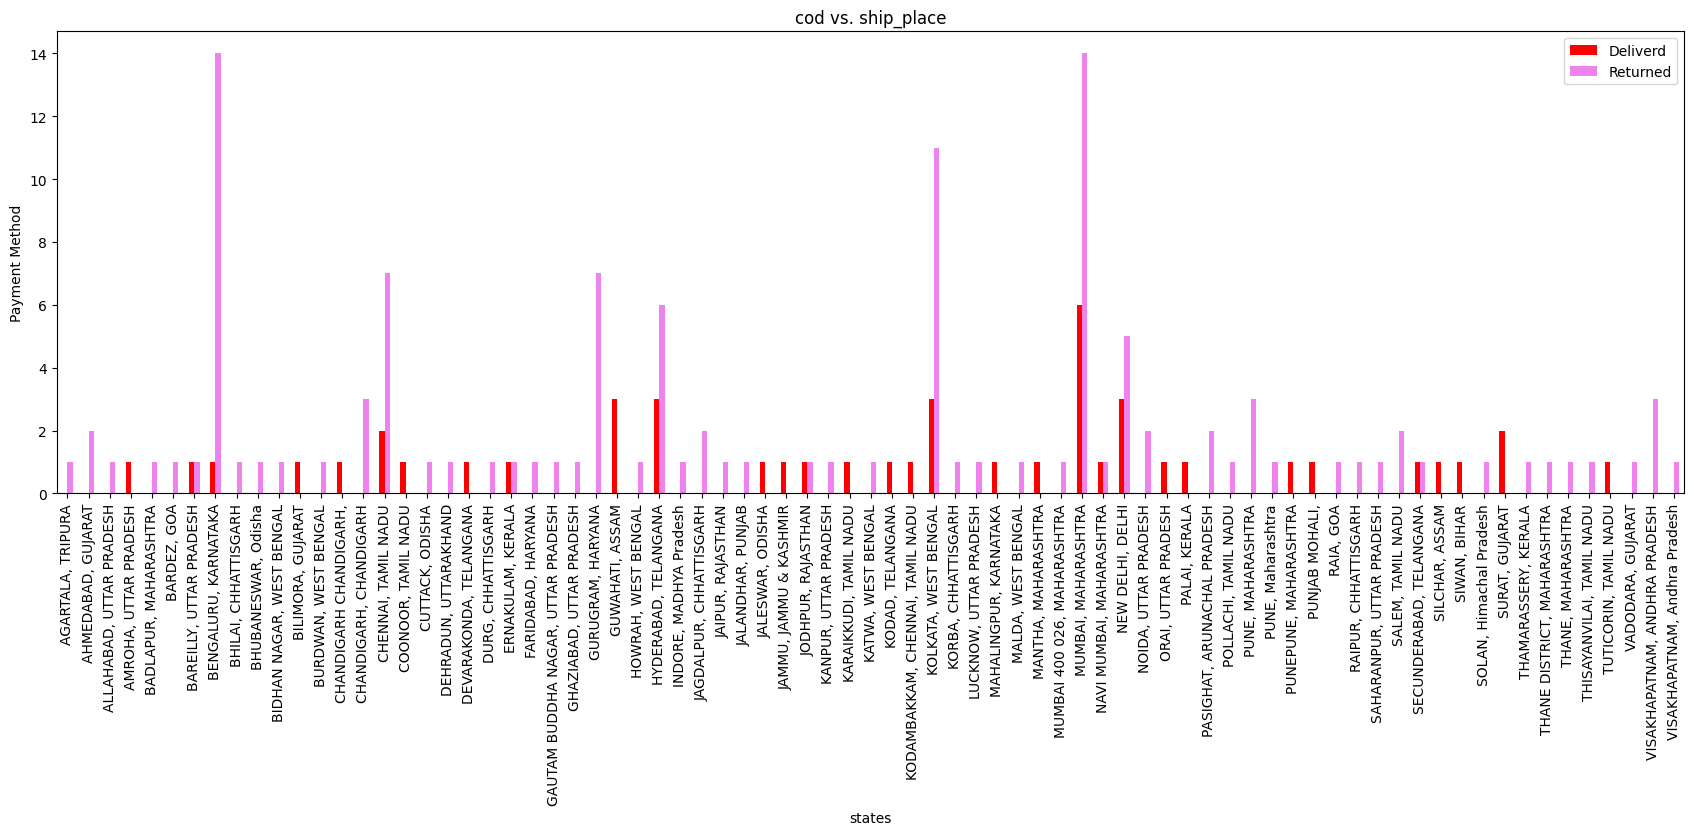

In [42]:
# Plotting the graph for cod vs. ship_place.
# The states(city) are arranged in ascending order.
pd.crosstab(data["ship_place"], data["cod"]).plot(kind="bar", figsize=(21,6),
                                                color=["red", "violet"]);


plt.title("cod vs. ship_place")
plt.xlabel("states")
plt.ylabel("Payment Method")
plt.legend(["Deliverd", "Returned"]);

In [43]:
data['order_no'].nunique()

171

In [44]:
data['buyer'].nunique()

149

since all the order_no are unique-doesnt give any information


In [45]:
data.drop(['order_no'],axis=1,inplace=True )

In [46]:
data.drop(['order_date'],inplace=True,axis=1)

In [47]:
data.head(5)

,buyer,sku,description,quantity,item_total,shipping_fee,cod,order_status,ship_place
0,Mr.,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,449.0,0.00,Online payment,Delivered to buyer,"CHANDIGARH, CHANDIGARH"
1,Minam,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,Online payment,Delivered to buyer,"PASIGHAT, ARUNACHAL PRADESH"
2,yatipertin,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,Online payment,Delivered to buyer,"PASIGHAT, ARUNACHAL PRADESH"
3,aciya,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,0.0,0.00,Cash On Delivery,Delivered to buyer,"DEVARAKONDA, TELANGANA"
4,Susmita,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,1099.0,84.96,Online payment,Delivered to buyer,"MUMBAI, MAHARASHTRA"


In [48]:
data.dtypes

buyer            object
sku              object
description      object
quantity          int64
item_total      float64
shipping_fee    float64
cod              object
order_status     object
ship_place       object
dtype: object

Data Conversion


In [49]:
from sklearn.preprocessing import LabelEncoder
data['buyer'].nunique()

149

In [50]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

In [51]:
data.drop(['buyer'],axis=1,inplace=True) # As most of the values are unique 

In [52]:
label_encoder=EncoderExt()
label_encoder.fit(data['sku'])
data['sku_enc']=label_encoder.transform(data['sku'])
data.drop(['sku'],axis=1,inplace=True)
data.head(5)

,description,quantity,item_total,shipping_fee,cod,order_status,ship_place,sku_enc
0,100% Leather Elephant Shaped Piggy Coin Bank |...,1,449.0,0.00,Online payment,Delivered to buyer,"CHANDIGARH, CHANDIGARH",2
1,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,Online payment,Delivered to buyer,"PASIGHAT, ARUNACHAL PRADESH",22
2,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,Online payment,Delivered to buyer,"PASIGHAT, ARUNACHAL PRADESH",22
3,Pure 100% Leather Block Print Rectangular Jewe...,1,0.0,0.00,Cash On Delivery,Delivered to buyer,"DEVARAKONDA, TELANGANA",17
4,Pure Leather Sling Bag with Multiple Pockets a...,1,1099.0,84.96,Online payment,Delivered to buyer,"MUMBAI, MAHARASHTRA",29


# 0->means(Delivered)  ,  1->means(Returned)


In [53]:
data['order_status']=data['order_status'].str.replace('Delivered to buyer','0').str.replace('Returned to seller','1').astype(int)
data['order_status'].value_counts()

order_status
0    160
1     11
Name: count, dtype: int64

if online payment=1
if cod=2

In [54]:
data['cod']=data['cod'].str.replace('Online payment','1').str.replace('Cash On Delivery','2').astype(int)
data['cod'].value_counts()

cod
1    124
2     47
Name: count, dtype: int64

In [55]:
data.head(2)

,description,quantity,item_total,shipping_fee,cod,order_status,ship_place,sku_enc
0,100% Leather Elephant Shaped Piggy Coin Bank |...,1,449.0,0.00,1,0,"CHANDIGARH, CHANDIGARH",2
1,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,1,0,"PASIGHAT, ARUNACHAL PRADESH",22


In [56]:
label_encoder = EncoderExt()
label_encoder.fit(data['description'])
data['description_enc']=label_encoder.transform(data['description'])


In [57]:
label_encoder = EncoderExt()
label_encoder.fit(data['ship_place'])
data['ship_place_enc']=label_encoder.transform(data['ship_place'])

In [58]:
data.drop(['description','ship_place'],axis=1,inplace=True)

In [59]:
data.dtypes

quantity             int64
item_total         float64
shipping_fee       float64
cod                  int32
order_status         int32
sku_enc              int32
description_enc      int32
ship_place_enc       int32
dtype: object

splitting my train & testing data set

In [60]:
Y=data['order_status']
X=data[['quantity','item_total','shipping_fee','cod','sku_enc','description_enc','ship_place_enc']]


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y ,train_size=0.7,random_state=42)

In [62]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((119, 7), (52, 7), (119,), (52,))

FEATURE SELECTION

In [63]:
from sklearn.feature_selection import VarianceThreshold
#To remove constant or near constant features
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

7

In [64]:
#Find constant columns
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


transpose the feature matrice

print the number of duplicated features

select the duplicated features columns names

In [65]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


In [66]:
# to find if there is any correlating features present 
def handling_correlation(X_train,threshold=0):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [67]:
handling_correlation(X_train,0)

['sku_enc',
 'description_enc',
 'cod',
 'ship_place_enc',
 'shipping_fee',
 'item_total']

In [68]:
from sklearn.feature_selection import VarianceThreshold
sel=VarianceThreshold(threshold=0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [69]:
sel.variances_

array([1.77812301e-01, 2.06546383e+05, 1.66607440e+03, 1.96596286e-01,
       2.12643316e+02, 4.20012570e+02, 4.19049361e+02])

In [70]:
X_train.drop(['quantity'],axis=1,inplace=True)
X_test.drop(['quantity'],axis=1,inplace=True)

# MODEL USED
Logistic 
SVM
Random Forest classifier
Decision Tree classifier
XGBoost

In [71]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

logisticR=LogisticRegression()
logisticR.fit(X_train,y_train)

DecisionTreeClassifier=DecisionTreeClassifier()
DecisionTreeClassifier.fit(X_train,y_train)

RandomForestClassifier=RandomForestClassifier()
RandomForestClassifier.fit(X_train,y_train)

xgb_classifier=xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)

svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train,y_train)

# K-nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [80]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, DecisionTreeClassifier

# Creating the machine learning models
logisticR = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

logisticR.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)


# Creating a dictionary to store the model predictions
model_predictions = {
    "Logistic Regression": logisticR.predict(X_test),
    "Decision Tree": decision_tree.predict(X_test),
    "Random Forest": random_forest.predict(X_test),
}


# Evaluating the models and printing the results
for model_name, predictions in model_predictions.items():
    accuracy = accuracy_score(y_test, predictions)
    confusion_mat = confusion_matrix(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Confusion Matrix:\n{confusion_mat}")
    print(f"ROC AUC: {roc_auc:.2f}\n")

ImportError: cannot import name 'DecisionTreeClassifier' from 'sklearn.ensemble' (C:\Users\ERNEST\anaconda3\envs\Creating_an_environment\Lib\site-packages\sklearn\ensemble\__init__.py)

In [ ]:
# Confusion Matrix, Accuracy Score, ROC AUC Score for Logistic Regression
cm_logistic = confusion_matrix(y_test, logisticR_predict)
accuracy_logistic = accuracy_score(y_test,logisticR_predict)
roc_auc_logistic = roc_auc_score(y_test, logisticR_predict)

print(cm_logistic,accuracy_logistic,roc_auc_logistic)

In [ ]:
# Confusion Matrix, Accuracy Score, ROC AUC Score for Decision Tree
cm_DecisionT = confusion_matrix(y_test, DecisionTreeClassifier_predict)
accuracy_DecisionT = accuracy_score(y_test,DecisionTreeClassifier_predict)
roc_auc_DecisionT = roc_auc_score(y_test, DecisionTreeClassifier_predict)

print(cm_DecisionT,accuracy_DecisionT,roc_auc_DecisionT)

In [ ]:
# Confusion Matrix, Accuracy Score, ROC AUC Score for Random Forest
cm_logistic = confusion_matrix(y_test, RandomForestClassifier_predict)
accuracy_logistic = accuracy_score(y_test,RandomForestClassifier_predict)
roc_auc_logistic = roc_auc_score(y_test, RandomForestClassifier_predict)

print(cm_logistic,accuracy_logistic,roc_auc_logistic)

In [ ]:
# Confusion Matrix, Accuracy Score, ROC AUC Score for XGB
cm_xgb = confusion_matrix(y_test, xgb_classifier_predict)
accuracy_xgb = accuracy_score(y_test,xgb_classifier_predict)
roc_auc_xgb = roc_auc_score(y_test, xgb_classifier_predict)

print(cm_xgb,accuracy_xgb,roc_auc_xgb)

In [ ]:
# Confusion Matrix, Accuracy Score, ROC AUC Score for svm
cm_svm = confusion_matrix(y_test, svm_classifier_predict)
accuracy_svm = accuracy_score(y_test,svm_classifier_predict)
roc_auc_svm = roc_auc_score(y_test, svm_classifier_predict)

print(cm_svm,accuracy_svm,roc_auc_svm)

In [ ]:
# Confusion Matrix, Accuracy Score, ROC AUC Score for K-nearest Neighbors
cm_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)
print(cm_knn,accuracy_knn,roc_auc_knn)